In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
def num_iter(z):
    G = nx.read_edgelist(str(z)+".txt", create_using = nx.DiGraph, nodetype=str)
    def pg(G, alpha=0.85, personalization=None,
                max_iter=1000, tol=1.0e-6, nstart=None, weight='weight',
                dangling=None):
            
        if len(G) == 0:
            return {}

        if not G.is_directed():
            D = G.to_directed()
        else:
            D = G

        # Create a copy in (right) stochastic form
        W = nx.stochastic_graph(D, weight=weight)
        N = W.number_of_nodes()

        # Choose fixed starting vector if not given
        if nstart is None:
            x = dict.fromkeys(W, 1.0 / N)
        else:
            # Normalized nstart vector
            s = float(sum(nstart.values()))
            x = dict((k, v / s) for k, v in nstart.items())

        if personalization is None:

            # Assign uniform personalization vector if not given
            p = dict.fromkeys(W, 1.0 / N)
        else:
            missing = set(G) - set(personalization)
            if missing:
                raise NetworkXError('Personalization dictionary '
                                    'must have a value for every node. '
                                    'Missing nodes %s' % missing)
            s = float(sum(personalization.values()))
            p = dict((k, v / s) for k, v in personalization.items())

        if dangling is None:

            # Use personalization vector if dangling vector not specified
            dangling_weights = p
        else:
            missing = set(G) - set(dangling)
            if missing:
                raise NetworkXError('Dangling node dictionary '
                                    'must have a value for every node. '
                                    'Missing nodes %s' % missing)
            s = float(sum(dangling.values()))
            dangling_weights = dict((k, v/s) for k, v in dangling.items())
        dangling_nodes = [n for n in W if W.out_degree(n, weight=weight) == 0.0]

        # power iteration: make up to max_iter iterations
        for i in range(max_iter):
            xlast = x
            x = dict.fromkeys(xlast.keys(), 0)
            danglesum = alpha * sum(xlast[n] for n in dangling_nodes)
            for n in x:

                # this matrix multiply looks odd because it is
                # doing a left multiply x^T=xlast^T*W
                for nbr in W[n]:
                    x[nbr] += alpha * xlast[n] * W[n][nbr][weight]
                x[n] += danglesum * dangling_weights[n] + (1.0 - alpha) * p[n]

            # check convergence, l1 norm
            err = sum([abs(x[n] - xlast[n]) for n in x])
            if err < N*tol:
                numb=i
                return x,numb
            else:
                i+=1
    pr= pg(G,alpha=0.85)
    pr
    def rank_by_points(points):
        points_dict=points[0].copy()
        sorted_points_dict= dict(sorted(points_dict.items(), key=lambda item: item[1],reverse=True))
    rank_by_points(pr)
    def iter_num(points):
        x=points[1]
        print("When alpha=0.85, the number of iterations:",x)
    iter_num(pr)
    def iter_list():
        lsty=[]
        lstn=[]
        for i in range(9):
            pr=pg(G,alpha=0.5+i*0.05)
            y=0.5+i*0.05
            lsty.append(y)
            lstn.append(pr[1])
            lst_all=list(zip(lsty,lstn))
        df=pd.DataFrame(lst_all,columns=["Alpha","Number of iterations"])
        print(df)
        df.plot(kind = 'scatter',x= 'Alpha',y = 'Number of iterations',color = 'red')
        plt.axhline(y=lstn[-2],color="g",linestyle="-")
        plt.title(str(z))
    iter_list()

When alpha=0.85, the number of iterations: 26
   Alpha  Number of iterations
0   0.50                     7
1   0.55                     8
2   0.60                     9
3   0.65                    11
4   0.70                    13
5   0.75                    15
6   0.80                    19
7   0.85                    26
8   0.90                    39


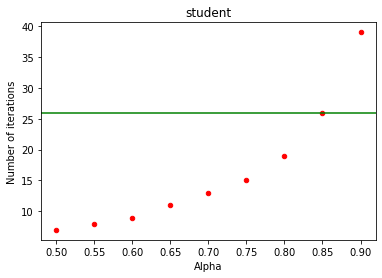

In [3]:
num_iter("student")

When alpha=0.85, the number of iterations: 33
   Alpha  Number of iterations
0   0.50                     8
1   0.55                    10
2   0.60                    11
3   0.65                    13
4   0.70                    16
5   0.75                    19
6   0.80                    25
7   0.85                    33
8   0.90                    48


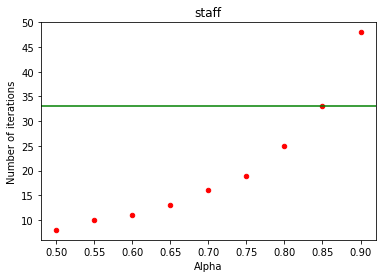

In [4]:
num_iter("staff")

When alpha=0.85, the number of iterations: 37
   Alpha  Number of iterations
0   0.50                     9
1   0.55                    10
2   0.60                    12
3   0.65                    14
4   0.70                    17
5   0.75                    21
6   0.80                    27
7   0.85                    37
8   0.90                    57


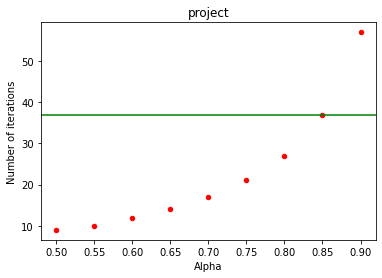

In [5]:
num_iter("project")

When alpha=0.85, the number of iterations: 30
   Alpha  Number of iterations
0   0.50                     7
1   0.55                     9
2   0.60                    10
3   0.65                    12
4   0.70                    14
5   0.75                    17
6   0.80                    22
7   0.85                    30
8   0.90                    46


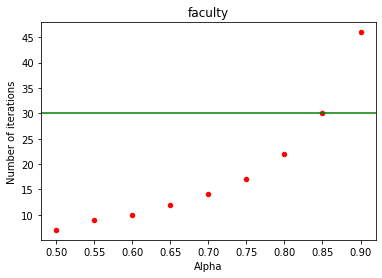

In [6]:
num_iter("faculty")

When alpha=0.85, the number of iterations: 23
   Alpha  Number of iterations
0   0.50                     6
1   0.55                     7
2   0.60                     8
3   0.65                    10
4   0.70                    12
5   0.75                    14
6   0.80                    18
7   0.85                    23
8   0.90                    33


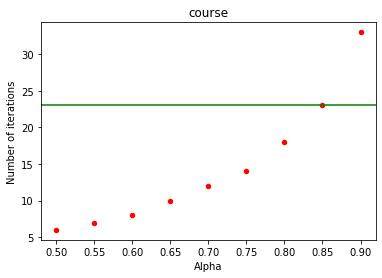

In [7]:
num_iter("course")